2022-1.csv: carregado com sucesso!
2022-10.csv: carregado com sucesso!
2022-11.csv: carregado com sucesso!
2022-12.csv: carregado com sucesso!
2022-2.csv: carregado com sucesso!
2022-3.csv: carregado com sucesso!
2022-4.csv: carregado com sucesso!
2022-5.csv: carregado com sucesso!
2022-6.csv: carregado com sucesso!
2022-7.csv: carregado com sucesso!
2022-8.csv: carregado com sucesso!
2022-9.csv: carregado com sucesso!
2023-1.csv: carregado com sucesso!
2024-1.csv: carregado com sucesso!


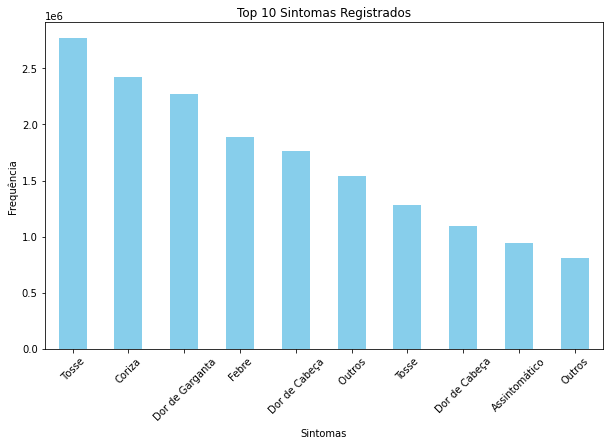

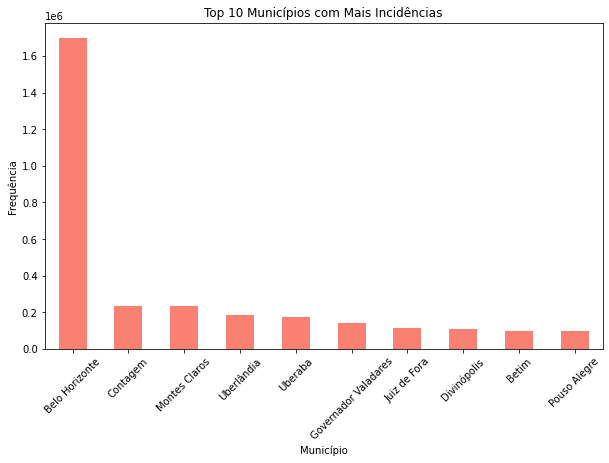

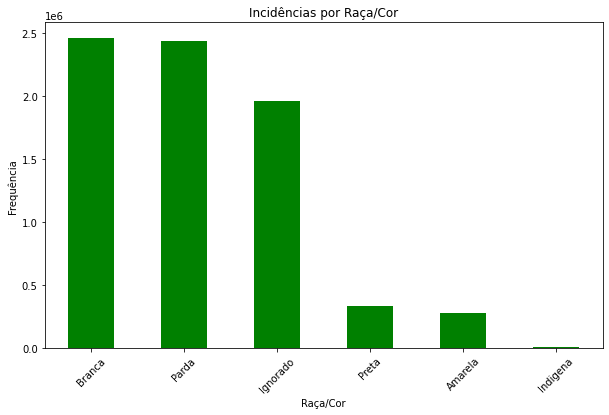

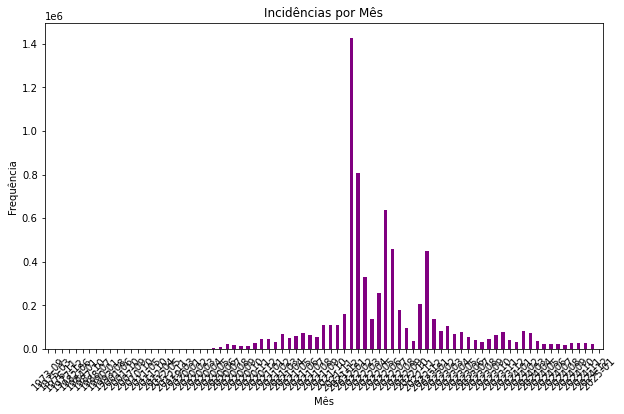

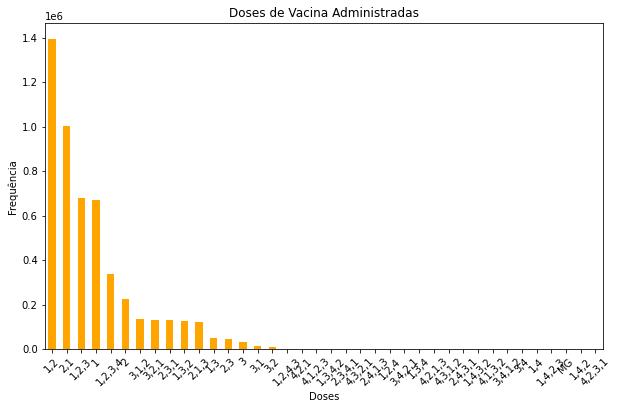

Análise e salvamento de resultados concluídos com sucesso!


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

# 1. Leitura e união dos arquivos CSV com tratamento de linhas problemáticas
file_paths = glob.glob("*.csv")  # Certifique-se de executar no diretório correto

dataframes = []
for file in file_paths:
    try:
        df = pd.read_csv(file, sep=';', encoding='utf-8', on_bad_lines='skip', low_memory=False)
        dataframes.append(df)
        print(f"{file}: carregado com sucesso!")
    except Exception as e:
        print(f"Erro ao carregar {file}: {e}")

data = pd.concat(dataframes, ignore_index=True)

# 2. Pré-processamento básico
# Converter datas para o formato datetime
data['dataNotificacao'] = pd.to_datetime(data['dataNotificacao'], errors='coerce')

# 3. Análise descritiva
## Principais sintomas
sintomas_counts = data['sintomas'].str.get_dummies(sep=',').sum().sort_values(ascending=False)

## Incidências por município
municipios_counts = data['municipioNotificacao'].value_counts()

## Incidências por raça/cor
raca_counts = data['racaCor'].value_counts()

## Doses de vacina
vacina_counts = data['codigoDosesVacina'].value_counts()

## Incidências por mês
data['mes'] = data['dataNotificacao'].dt.to_period('M')
mes_counts = data['mes'].value_counts().sort_index()

# 4. Visualizações
plt.figure(figsize=(10, 6))
sintomas_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Sintomas Registrados')
plt.xlabel('Sintomas')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
municipios_counts.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Municípios com Mais Incidências')
plt.xlabel('Município')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
raca_counts.plot(kind='bar', color='green')
plt.title('Incidências por Raça/Cor')
plt.xlabel('Raça/Cor')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
mes_counts.plot(kind='bar', color='purple')
plt.title('Incidências por Mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
vacina_counts.plot(kind='bar', color='orange')
plt.title('Doses de Vacina Administradas')
plt.xlabel('Doses')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

# 5. Salvar resultados principais para análise adicional
sintomas_counts.to_csv('sintomas_counts.csv', index=True)
municipios_counts.to_csv('municipios_counts.csv', index=True)
raca_counts.to_csv('raca_counts.csv', index=True)
vacina_counts.to_csv('vacina_counts.csv', index=True)
mes_counts.to_csv('mes_counts.csv', index=True)

print("Análise e salvamento de resultados concluídos com sucesso!")


/home/tonykaku/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


2022-1.csv: carregado com sucesso!
2022-10.csv: carregado com sucesso!
2022-11.csv: carregado com sucesso!
2022-12.csv: carregado com sucesso!
2022-2.csv: carregado com sucesso!
2022-3.csv: carregado com sucesso!
2022-4.csv: carregado com sucesso!
2022-5.csv: carregado com sucesso!
2022-6.csv: carregado com sucesso!
2022-7.csv: carregado com sucesso!
2022-8.csv: carregado com sucesso!
2022-9.csv: carregado com sucesso!
2023-1.csv: carregado com sucesso!
2024-1.csv: carregado com sucesso!
mes_counts.csv: carregado com sucesso!
municipios_counts.csv: carregado com sucesso!
raca_counts.csv: carregado com sucesso!
sintomas_counts.csv: carregado com sucesso!
vacina_counts.csv: carregado com sucesso!


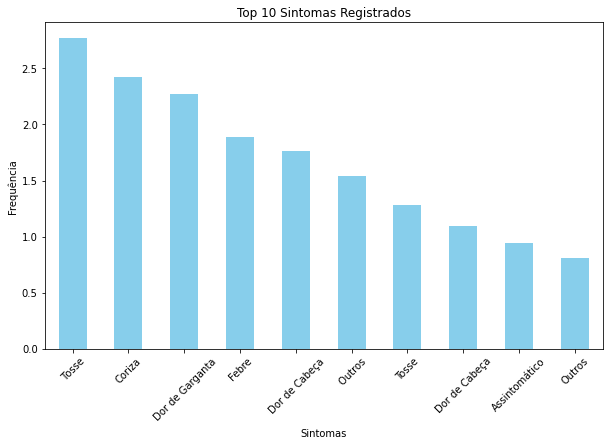

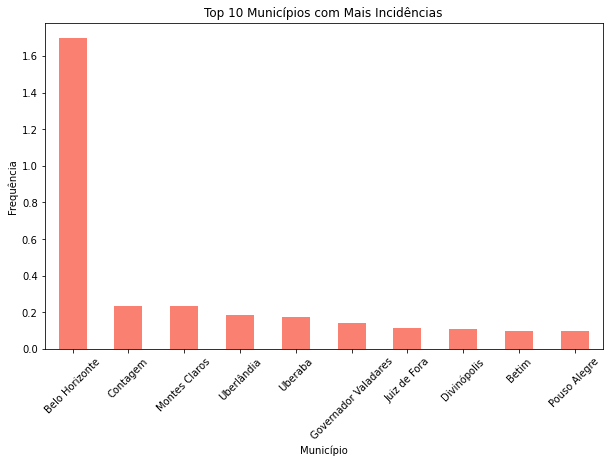

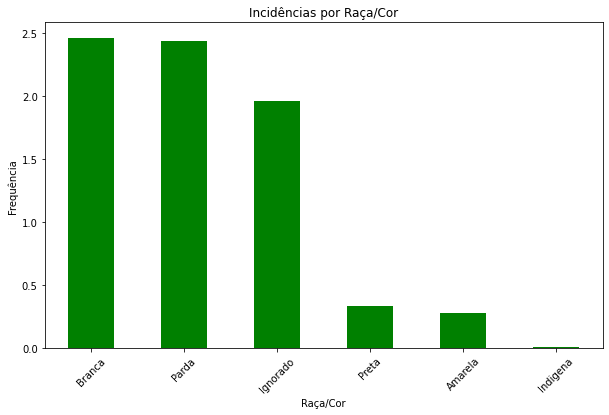

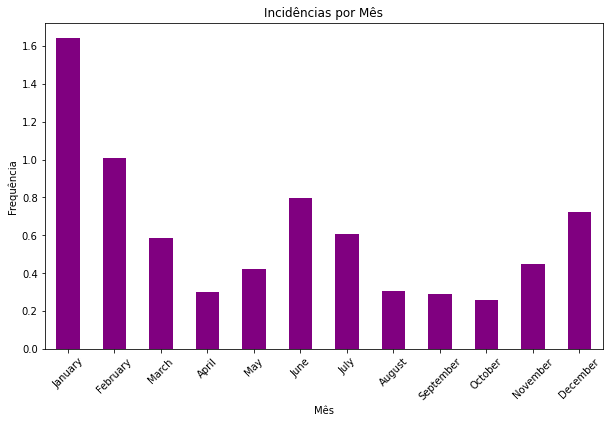

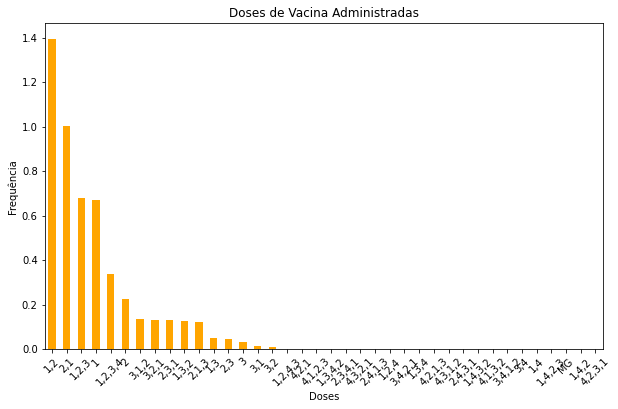

Análise e salvamento de resultados concluídos com sucesso!


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

# 1. Leitura e união dos arquivos CSV com tratamento de linhas problemáticas
file_paths = glob.glob("*.csv")  # Certifique-se de executar no diretório correto

dataframes = []
for file in file_paths:
    try:
        df = pd.read_csv(file, sep=';', encoding='utf-8', on_bad_lines='skip', low_memory=False)
        dataframes.append(df)
        print(f"{file}: carregado com sucesso!")
    except Exception as e:
        print(f"Erro ao carregar {file}: {e}")

data = pd.concat(dataframes, ignore_index=True)

# 2. Pré-processamento básico
# Converter datas para o formato datetime
data['dataNotificacao'] = pd.to_datetime(data['dataNotificacao'], errors='coerce')

# 3. Análise descritiva
## Principais sintomas
sintomas_counts = data['sintomas'].str.get_dummies(sep=',').sum().sort_values(ascending=False)

## Incidências por município
municipios_counts = data['municipioNotificacao'].value_counts()

## Incidências por raça/cor
raca_counts = data['racaCor'].value_counts()

## Doses de vacina
vacina_counts = data['codigoDosesVacina'].value_counts()

## Incidências por mês
# Extraindo apenas o nome do mês
data['mes'] = data['dataNotificacao'].dt.month_name()
mes_counts = data['mes'].value_counts().reindex(
    ["January", "February", "March", "April", "May", "June", 
     "July", "August", "September", "October", "November", "December"]
)

# 4. Visualizações
plt.figure(figsize=(10, 6))
sintomas_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Sintomas Registrados')
plt.xlabel('Sintomas')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.gca().get_yaxis().get_offset_text().set_visible(False)  # Remove 10^6 no eixo Y
plt.show()

plt.figure(figsize=(10, 6))
municipios_counts.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Municípios com Mais Incidências')
plt.xlabel('Município')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.gca().get_yaxis().get_offset_text().set_visible(False)  # Remove 10^6 no eixo Y
plt.show()

plt.figure(figsize=(10, 6))
raca_counts.plot(kind='bar', color='green')
plt.title('Incidências por Raça/Cor')
plt.xlabel('Raça/Cor')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.gca().get_yaxis().get_offset_text().set_visible(False)  # Remove 10^6 no eixo Y
plt.show()

plt.figure(figsize=(10, 6))
mes_counts.plot(kind='bar', color='purple')
plt.title('Incidências por Mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.gca().get_yaxis().get_offset_text().set_visible(False)  # Remove 10^6 no eixo Y
plt.show()

plt.figure(figsize=(10, 6))
vacina_counts.plot(kind='bar', color='orange')
plt.title('Doses de Vacina Administradas')
plt.xlabel('Doses')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.gca().get_yaxis().get_offset_text().set_visible(False)  # Remove 10^6 no eixo Y
plt.show()

# 5. Salvar resultados principais para análise adicional
sintomas_counts.to_csv('sintomas_counts.csv', index=True)
municipios_counts.to_csv('municipios_counts.csv', index=True)
raca_counts.to_csv('raca_counts.csv', index=True)
vacina_counts.to_csv('vacina_counts.csv', index=True)
mes_counts.to_csv('mes_counts.csv', index=True)

print("Análise e salvamento de resultados concluídos com sucesso!")
